In [1]:
import d3ploy.tester as tester
import d3ploy.plotter as plotter
import matplotlib.pyplot as plt
from collections import Counter
from cycler import cycler
import numpy as np
from textwrap import wrap

In [2]:
output_file = 'eg01-eg23-flatpower-d3ploy-buffer0-ma.sqlite'
demand_eq = '60000'
#commods = ['sourceout','enrichmentout','mixerout','power']

In [3]:
def supplydemanddiff(all_dict):
    
    dict_demand = all_dict['dict_demand']
    dict_supply = all_dict['dict_supply']
    diff_dict = {}
    for key in dict_demand: 
        diff_dict[key] = dict_supply[key] - dict_demand[key] 
    return diff_dict

In [12]:
def get_undersupply_timesteps(output_file,commod,driving_commod=False,demand_eq='0',demand_driving=True):
    
    if driving_commod:
        all_dict = tester.supply_demand_dict_driving(output_file, demand_eq, commod)
    else: 
        if demand_driving: 
            all_dict = tester.supply_demand_dict_nondriving(output_file, commod, True, calc=False)
        else: 
            all_dict = tester.supply_demand_dict_nondriving(output_file, commod, False, calc=False)
    diff_dict = supplydemanddiff(all_dict)
    dict_dots = {}
    diff_dict_drop = {}
    for key in diff_dict: 
        if demand_driving: 
            if diff_dict[key] < 0: 
                dict_dots[key] = 1
                diff_dict_drop[key] = diff_dict[key]
                
        else: 
            if diff_dict[key] > 0: 
                dict_dots[key] = 1
                diff_dict_drop[key] = diff_dict[key]
    return dict_dots, diff_dict_drop

In [39]:
def plot_all_undersupply(commods,commodnames,methods,general_sqlite,demand_driven=True,demand_eq='0',title='',name='hello'): 
    num = len(commods)*1.5
    fig, ax = plt.subplots(figsize=(15, num))
    NUM_COLORS = 10
    cm = plt.get_cmap("tab10")
    colors = [cm(1.0 * i / NUM_COLORS) for i in range(NUM_COLORS)]
    for y in range(len(methods)):
        output_file = general_sqlite+methods[y]+'.sqlite'
        for x in range(len(commods)): 
            if commods[x] == 'power': 
                dots, diff = get_undersupply_timesteps(output_file,commods[x],demand_eq=demand_eq,driving_commod=True)
            elif demand_driven: 
                dots, diff = get_undersupply_timesteps(output_file,commods[x])
            else: 
                dots, diff  = get_undersupply_timesteps(output_file,commods[x],demand_driving=False)
            for key in dots:
                dots[key]*=(x+0.1*y)
            print(len(dots))
            print(sum(diff.values()))
            a = list(diff.values())
            a = [abs(x) for x in a]
            size= [ abs(round(elem/max(a)*100)) for elem in a ]
            if x == 0: 
                ax.scatter(dots.keys(),dots.values(),color=colors[y],s=size,label=methods[y])
            else:
                ax.scatter(dots.keys(),dots.values(),color=colors[y],s=size)
    ax.set_xlim(0,1450)
    ax.set_ylim(0,len(commods))
    ax.set_yticks(np.arange(0,len(commods)))
    commodnames = [ '\n'.join(wrap(l, 9)) for l in commodnames ]
    ax.set_yticklabels(commodnames)
    ax.grid(alpha=0.7)
    plt.axvspan(961, 1141, color='yellow', alpha=0.3,label='Transition Period')
    ax.legend(bbox_to_anchor=(1.17, 1))
    ax.set_xlabel('Time Steps (Months)')
    ax.set_ylabel('Commodities')
    ax.set_title(title)
    plt.savefig(name,dpi=300,bbox_inches='tight')
    plt.show()

6
-21271316.668123998
4
-48982202.79943998
0
0
26
-305988.24
6
-21271316.668123998
4
-48982202.79943998
0
0
26
-305988.24
6
-21271316.668123998
4
-48982202.79943998
0
0
26
-305988.24
2
-4713002.610274616
4
-48549369.67932794
0
0
6
-235000.0
6
-21080238.71214641
5
-65108384.79944003
0
0
27
-365988.24
6
-21080238.71214641
5
-65108384.79944003
0
0
27
-365988.24
3
-5986602.012952569
6
-66989153.2303869
0
0
8
-307000.0
4
-6176919.057412182
4
-48982202.79943998
0
0
36
-307978.26


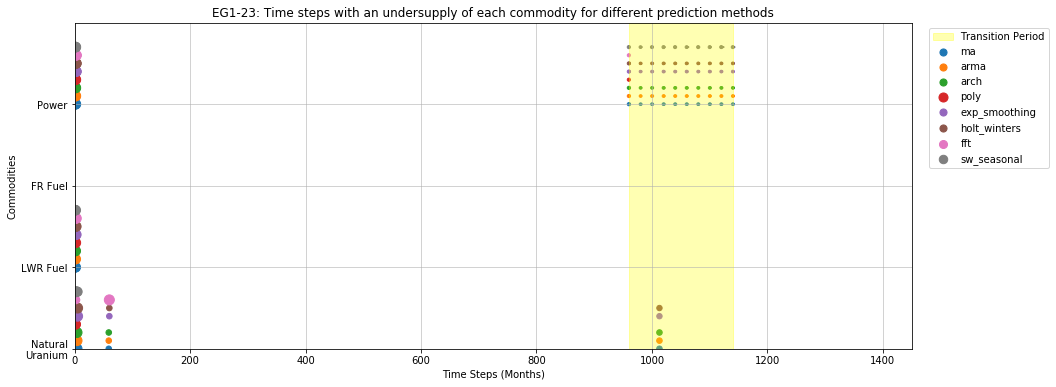

1
89589.9
1
149316.5
1
1740.6407102416895
1
17493.97317402868
5
316796.0
1
134941.0
1
89589.9
1
149316.5
1
1740.640710241695
1
17493.97317402868
5
316796.0
1
134941.0
1
89589.9
1
149316.5
1
1740.6407102416895
1
17493.973174028622
5
316796.0
1
134941.0
1
149316.5
1
149316.5
1
1740.2794787856499
1
27380.503425696435
1
211212.0
1
211212.0
1
89589.9
1
149316.5
1
1740.6407102416895
1
17493.97317402868
5
316796.0
1
134941.0
1
89589.9
1
149316.5
1
1740.6407102416877
1
17493.97317402868
5
316796.0
1
134941.0
1
89589.9
1
89589.9
1
1044.16768727139
1
27380.503425696435
1
211212.0
1
211212.0
1
89589.9
1
149316.5
1
1740.6407102416895
1
15972.085154965693
7
746381.0
1
123207.0


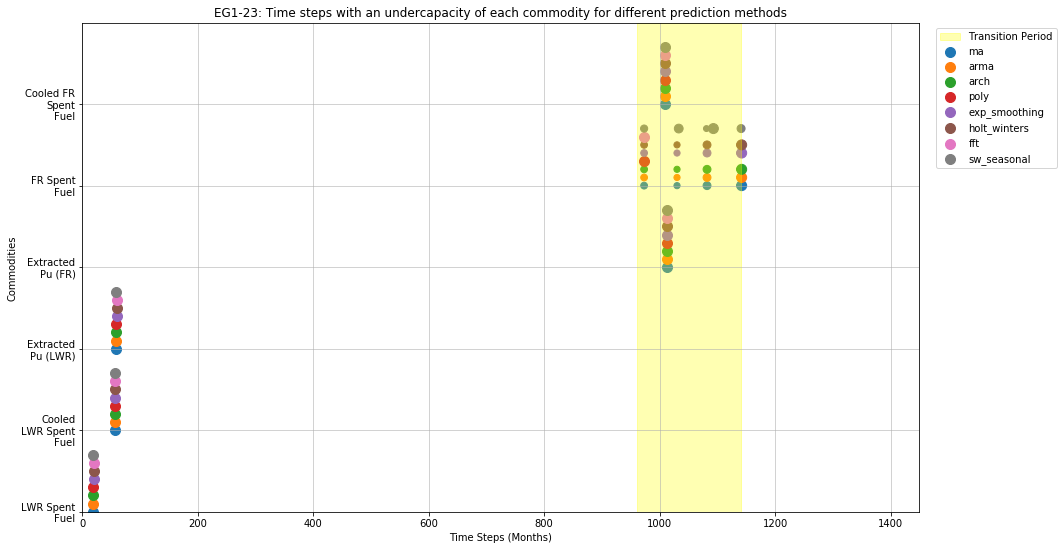

In [40]:
commods = ['sourceout',
           'enrichmentout',
           'mixerout',
           'power']
commodnames = ['Natural Uranium',
               'LWR Fuel',
               'FR Fuel',
               'Power']
methods = ['ma','arma','arch','poly','exp_smoothing','holt_winters','fft','sw_seasonal']
general_sqlite = 'eg01-eg23-flatpower-d3ploy-buffer0-S1-'
plot_all_undersupply(commods,commodnames,methods,general_sqlite,demand_driven=True,demand_eq='60000',
                     title='EG1-23: Time steps with an undersupply of each commodity for different prediction methods',
                    name = 'eg23-undersupply')

commods = ['lwrout',
           'lwrstorageout',
           'lwrpu',
           'frpu',
           'frout',
           'frstorageout']
commodnames = ['LWR Spent Fuel',
               'Cooled LWR Spent Fuel',
               'Extracted Pu (LWR)',
               'Extracted Pu (FR)',
               'FR Spent Fuel',
               'Cooled FR Spent Fuel']
methods = ['ma','arma','arch','poly','exp_smoothing','holt_winters','fft','sw_seasonal']
general_sqlite = 'eg01-eg23-flatpower-d3ploy-buffer0-S1-'
plot_all_undersupply(commods,commodnames,methods,general_sqlite,demand_driven=False,
                    title='EG1-23: Time steps with an undercapacity of each commodity for different prediction methods',
                    name = 'eg23-undercapacity')

20
-315196.553333
9
-306520.586667
8
-303437.5
7
-301437.5
7
-301437.5


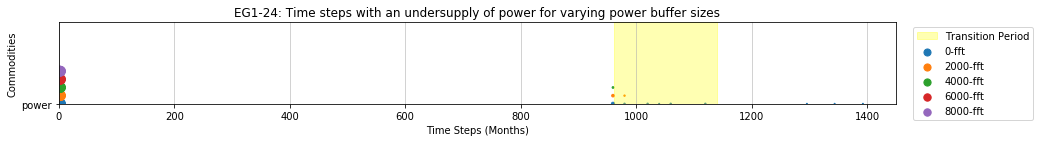

In [41]:
commods = ['power']
commodnames = ['power']
methods = ['0-fft','2000-fft','4000-fft','6000-fft','8000-fft']
general_sqlite = 'eg01-eg24-linpower-d3ploy-buffer'
plot_all_undersupply(commods,commodnames,methods,general_sqlite,demand_eq='60000 + 250*t/12',
                     title='EG1-24: Time steps with an undersupply of power for varying power buffer sizes',
                     name='eg24-sa')

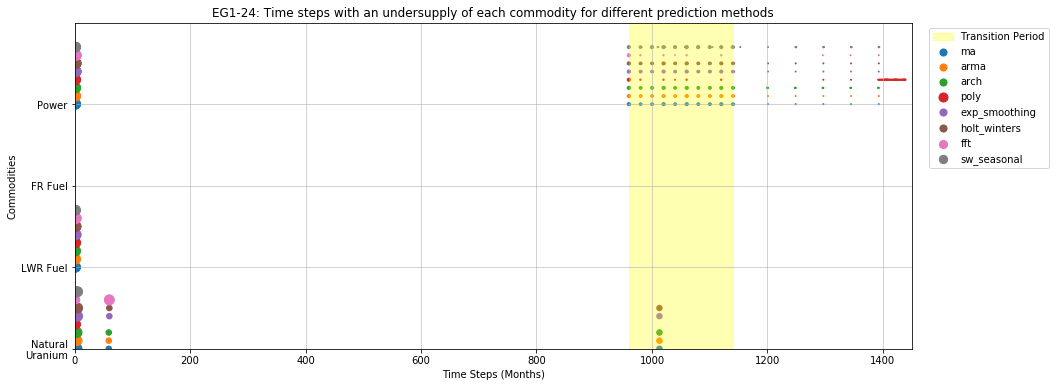

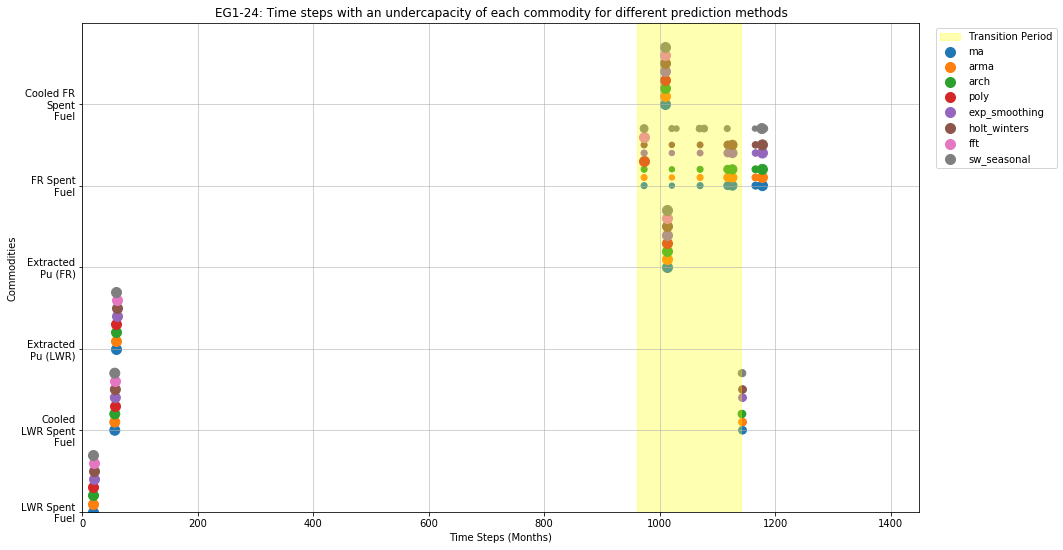

In [30]:
commods = ['sourceout',
           'enrichmentout',
           'mixerout',
           'power']
commodnames = ['Natural Uranium',
               'LWR Fuel',
               'FR Fuel',
               'Power']
methods = ['ma','arma','arch','poly','exp_smoothing','holt_winters','fft','sw_seasonal']
general_sqlite = 'eg01-eg24-linpower-d3ploy-buffer0-'
plot_all_undersupply(commods,commodnames,methods,general_sqlite,demand_driven=True,demand_eq='60000 + 250*t/12',
                     title='EG1-24: Time steps with an undersupply of each commodity for different prediction methods',
                    name = 'eg24-undersupply')

commods = ['lwrout',
           'lwrstorageout',
           'lwrtru',
           'frtru',
           'frout',
           'frstorageout']
commodnames = ['LWR Spent Fuel',
               'Cooled LWR Spent Fuel',
               'Extracted Pu (LWR)',
               'Extracted Pu (FR)',
               'FR Spent Fuel',
               'Cooled FR Spent Fuel']
methods = ['ma','arma','arch','poly','exp_smoothing','holt_winters','fft','sw_seasonal']
general_sqlite = 'eg01-eg24-linpower-d3ploy-buffer0-'
plot_all_undersupply(commods,commodnames,methods,general_sqlite,demand_driven=False,
                    title='EG1-24: Time steps with an undercapacity of each commodity for different prediction methods',
                    name = 'eg24-undercapacity')

9
-152517.486667
6
-147166.32
6
-143166.32
5
-139083.333333
5
-135083.333333


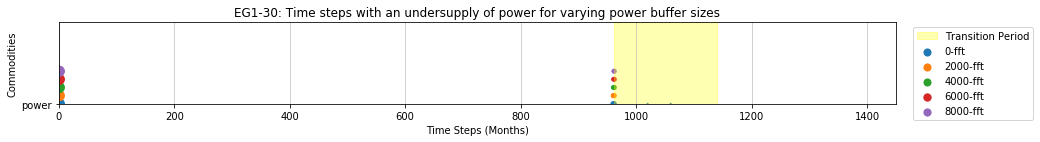

In [42]:
commods = ['power']
commodnames = ['power']
methods = ['0-fft','2000-fft','4000-fft','6000-fft','8000-fft']
general_sqlite = 'eg01-eg30-linpower-d3ploy-buffer'
plot_all_undersupply(commods,commodnames,methods,general_sqlite,demand_eq='60000 + 250*t/12',
                     title='EG1-30: Time steps with an undersupply of power for varying power buffer sizes',
                     name='eg30-sa')